# <center>Simple Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
    
## Practice

### 1. Import libraries and load dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [128]:
df['CYLINDERS'].unique()

array([ 4,  6, 12,  8, 10,  3,  5])

### 2. Sanity check

In [5]:
df.shape

(1067, 13)

In [7]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
#Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [11]:
df.memory_usage().sum()

111096

In [13]:
#Kiểm tra phân bố dữ liệu
df.describe()
## -> Phân phối dạng chuẩn

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
df[['MODEL','MAKE','VEHICLECLASS','TRANSMISSION','FUELTYPE']].describe()

,MODEL,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,663,39,16,22,4
top,F150 FFV,FORD,MID-SIZE,A6,X
freq,8,90,178,222,514


### 3. Eploratory Data Analysis

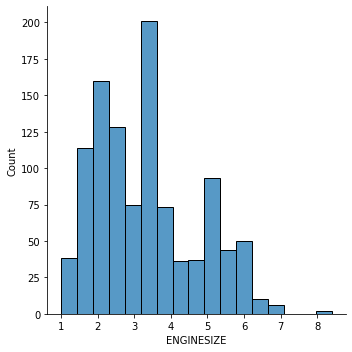

In [18]:
sns.displot(data=df['ENGINESIZE'])
plt.show()

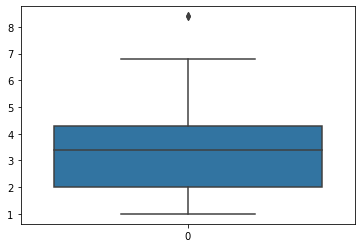

In [19]:
sns.boxplot(data=df['ENGINESIZE'])
plt.show()

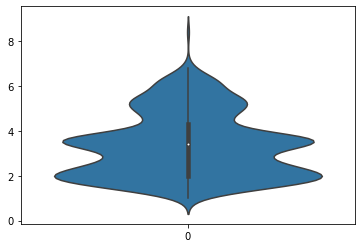

In [20]:
sns.violinplot(data=df['ENGINESIZE'])
plt.show()

<AxesSubplot:>

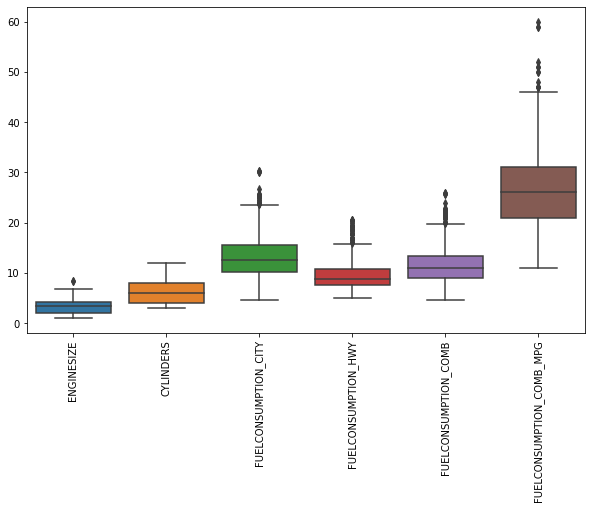

In [38]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))

### 4. Feature selection

In [34]:
df.drop(columns='MODELYEAR').corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


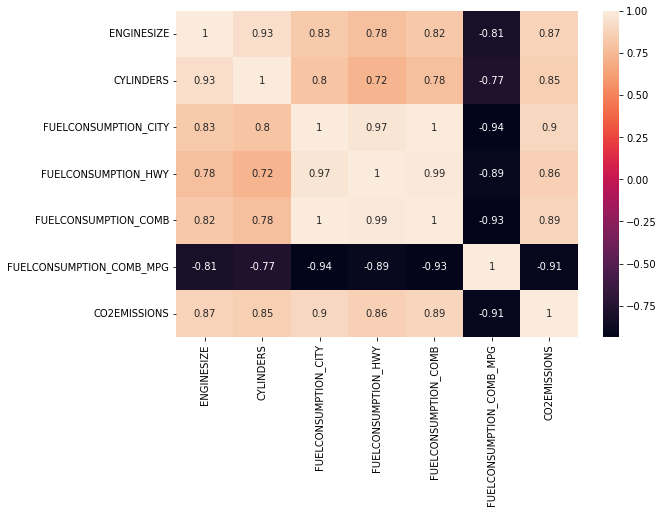

In [48]:
plt.figure(figsize=(9,6))
sns.heatmap(data=df.drop(columns='MODELYEAR').corr(),annot=True)# linewidths=0.01, linecolor='white')
plt.show()

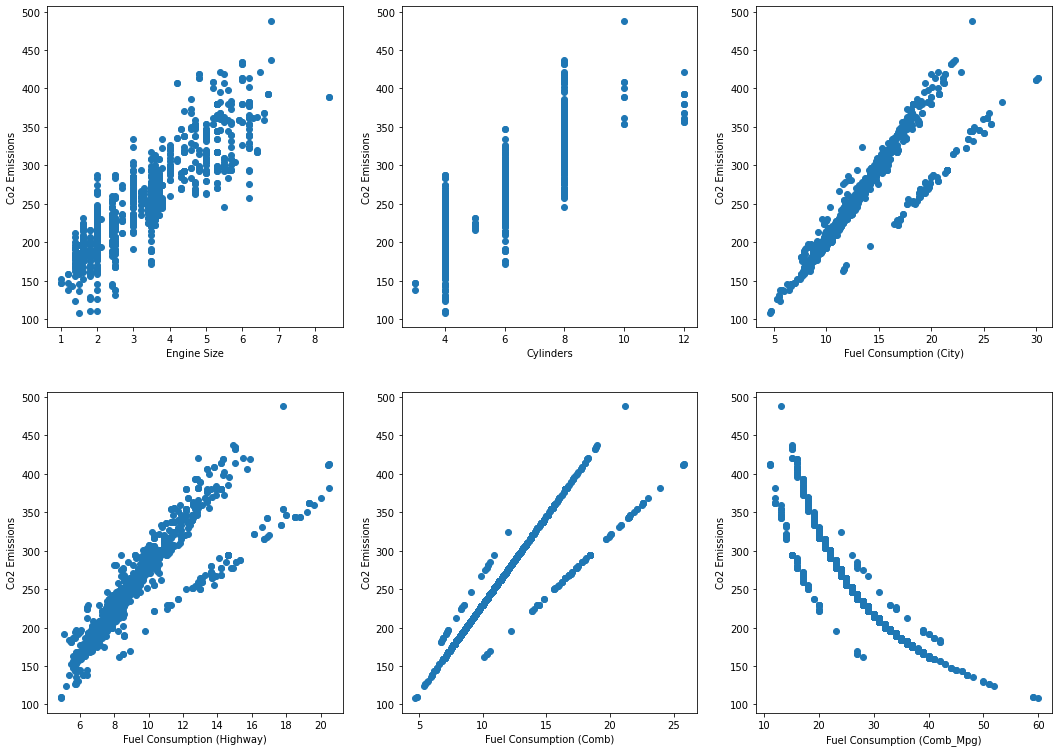

In [88]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18,13))
ax[0][0].scatter(x=df.ENGINESIZE,y=df.CO2EMISSIONS)
ax[0][0].set(xlabel='Engine Size',ylabel='Co2 Emissions')

ax[0][1].scatter(x=df.CYLINDERS,y=df.CO2EMISSIONS)
ax[0][1].set(xlabel='Cylinders',ylabel='Co2 Emissions')

ax[0][2].scatter(x=df.FUELCONSUMPTION_CITY,y=df.CO2EMISSIONS)
ax[0][2].set(xlabel='Fuel Consumption (City)',ylabel='Co2 Emissions')

ax[1][0].scatter(x=df.FUELCONSUMPTION_HWY,y=df.CO2EMISSIONS)
ax[1][0].set(xlabel='Fuel Consumption (Highway)',ylabel='Co2 Emissions')

ax[1][1].scatter(x=df.FUELCONSUMPTION_COMB,y=df.CO2EMISSIONS)
ax[1][1].set(xlabel='Fuel Consumption (Comb)',ylabel='Co2 Emissions')

ax[1][2].scatter(x=df.FUELCONSUMPTION_COMB_MPG,y=df.CO2EMISSIONS)
ax[1][2].set(xlabel='Fuel Consumption (Comb_Mpg)',ylabel='Co2 Emissions')
plt.show()

### 5. Train model

In [90]:
!pip install sklearn

     |████████████████████████████████| 7.9 MB 1.4 MB/s eta 0:00:012 kB 1.1 MB/s eta 0:00:07��█████                      | 2.4 MB 1.1 MB/s eta 0:00:05   |███████████▊                    | 2.9 MB 1.1 MB/s eta 0:00:05��███████        | 5.9 MB 1.4 MB/s eta 0:00:02K     |██████████████████████████▏     | 6.4 MB 1.4 MB/s eta 0:00:02B/s eta 0:00:01██████████▎ | 7.4 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 1.7 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=9dc43c9b05c2fc2e218b850b6afbee06b6967f428d83e1d55aeb3ee53d2cc899
  Stored in directory: /Users/djbunny/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [94]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()
model.fit(df[['ENGINESIZE']],df['CO2EMISSIONS']) ##feature, label

LinearRegression()

In [100]:
model.coef_ ##tìm ra giá trị a với y=ax+b

array([39.12519979])

In [103]:
model.intercept_ ##tìm ra giá trị b với y=ax+b

125.3040994953569

In [102]:
predict = model.predict(df[['ENGINESIZE']])
predict

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [104]:
#y= ax + b
predict1 = model.coef_[0]*df[['ENGINESIZE']] + model.intercept_
predict1

,ENGINESIZE
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [105]:
pd.DataFrame({'auto':predict,'manual':predict1.ENGINESIZE.to_list()})

,auto,manual
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


## Evaluation method

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)
![](https://i0.wp.com/trituenhantao.io/wp-content/uploads/2020/01/k-fold.png?fit=1200%2C592&ssl=1)

In [107]:
from sklearn.model_selection import train_test_split

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['ENGINESIZE']],df.CO2EMISSIONS, test_size=0.2, random_state=24)

In [117]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((853, 1), (214, 1), (853,), (214,))

In [116]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [118]:
predict2 = model.predict(xtest)
predict2

array([266.39140429, 204.08187805, 204.08187805, 180.71580571,
       250.81402273, 180.71580571, 266.39140429, 266.39140429,
       262.4970589 , 204.08187805, 219.65925961, 320.91223974,
       332.59527591, 332.59527591, 332.59527591, 196.29318727,
       196.29318727, 180.71580571, 266.39140429, 188.50449649,
       184.6101511 , 204.08187805, 270.28574968, 204.08187805,
       262.4970589 , 204.08187805, 188.50449649, 243.02533195,
       188.50449649, 367.64438442, 274.18009506, 262.4970589 ,
       281.96878584, 243.02533195, 320.91223974, 188.50449649,
       204.08187805, 344.27831208, 281.96878584, 188.50449649,
       266.39140429, 262.4970589 , 367.64438442, 223.553605  ,
       332.59527591, 188.50449649, 204.08187805, 180.71580571,
       243.02533195, 204.08187805, 262.4970589 , 297.5461674 ,
       243.02533195, 204.08187805, 332.59527591, 204.08187805,
       262.4970589 , 243.02533195, 336.4896213 , 188.50449649,
       266.39140429, 320.91223974, 340.38396669, 320.91

In [119]:
pd.DataFrame({'prediction':predict2,
              'groundtruth': ytest})

,prediction,groundtruth
326,266.391404,271
1016,204.081878,209
201,204.081878,192
271,180.715806,193
1066,250.814023,294
...,...,...
769,340.383967,304
277,266.391404,242
508,254.708368,258
1052,204.081878,267


### 6. Evaluation
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R2-Score

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [121]:
mean_absolute_error(ytest, predict2)

23.481659007077802

In [122]:
mean_squared_error(ytest,predict2)

972.636488560585

In [123]:
r2_score(ytest, predict2)

0.7499376476944938

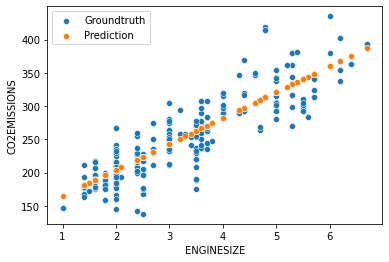

In [127]:
sns.scatterplot(x=xtest.ENGINESIZE, y=ytest, label='Groundtruth')
sns.scatterplot(x=xtest.ENGINESIZE, y=predict2, label ='Prediction')
plt.legend()
plt.show()